
# Project 1: Comprehensive Regression Analysis
### Course: Introduction to Machine Learning





### Team Name: **Insight Engineers**
### Name and ID of Member 1: **Sayan Das** - ``B2430035``
### Name and ID of Member 2: **Raihan Uddin** - ``B2430070``

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# Add all other libraries you would require
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from copy import deepcopy
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


## 1. Load the Dataset
**Instruction:** Load the chosen dataset and display its basic information and statistics. You may use any well-known dataset.

In [2]:

# Loading a particular dataset


from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)
dataset['target']=housing.target
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:

# Display basic statistics
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010



## 2. Data Preprocessing
**Instruction:** Perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling features if required.


In [4]:

# Checking for missing values
dataset.isnull().sum().to_frame('Missing Values')

,Missing Values
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [6]:

# Splitting the dataset into features (X) and target (y)
X = dataset.drop(columns=['target'])  # Features (all columns except 'target')
y = dataset['target']


In [7]:

# Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shapes of the resulting datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Shapes of the resulting datasets:
X_train: (16512, 8), y_train: (16512,)
X_test: (4128, 8), y_test: (4128,)


In [8]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [9]:
matrices = pd.DataFrame(columns=['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2', 'Time Taken'])


## 3. Simple Linear Regression
**Instruction:** Implement a simple linear regression model using scikit-learn.


In [10]:
# Since this dataset has 8 features, we will use a multiple  linear regression model to predict the target variable
# Define the linear regression model
model = LinearRegression()

# Fit the model on the training data
start_time_slr = time.time()
model.fit(X_train, y_train)
end_time_slr = time.time()

# Predict on the test data
y_pred = model.predict(X_test)
# Predict on the training data for error calculation
y_train_pred = model.predict(X_train)

# Calculate performance metrics [MSE, MAE, R^2]
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
time_taken_slr = end_time_slr - start_time_slr

# Print the metrics
matrices.loc['Simple Linear Regression'] = [mse_train, mse_test, mae_train, mae_test, r2_train, r2_test, time_taken_slr]

matrices

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2,Time Taken
Simple Linear Regression,0.517933,0.555892,0.528628,0.5332,0.612551,0.575788,0.003999



## 4. Polynomial Regression
**Instruction:** Implement polynomial regression for degrees 2, 3, and 4.


In [11]:

def polynomial_regression(degree):
    # Split the data into training and test sets first
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define polynomial features and apply only to the training set
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_poly)
    X_test_poly = poly.transform(X_test_poly)  # Transform the test set using the same polynomial features

    # Fit the linear model on polynomial features
    poly_model = LinearRegression()
    start_time_poly = time.time()
    poly_model.fit(X_train_poly, y_train)
    end_time_poly = time.time()

    # Predict and evaluate performance
    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)

    # Calculate performance metrics for polynomial regression
    mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
    mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
    mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
    mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
    r2_train_poly = r2_score(y_train, y_train_pred_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    time_taken_poly = end_time_poly - start_time_poly

    model_name = f'Polynomial Linear Regression (degree - {degree})'
    matrices.loc[model_name] = [mse_train_poly, mse_test_poly, mae_train_poly, mae_test_poly, r2_train_poly, r2_test_poly, time_taken_poly]

for degree in [2, 3, 4]:
    polynomial_regression(degree)
    
matrices

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2,Time Taken
Simple Linear Regression,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.003999
Polynomial Linear Regression (degree - 2),0.420727,0.464302,0.460838,0.467001,0.685268,0.645682,0.027997
Polynomial Linear Regression (degree - 3),0.342608,20.009742,0.416137,0.525636,0.743706,-14.269845,0.229719
Polynomial Linear Regression (degree - 4),0.470660,2396.745690,0.471706,1.605144,0.647915,-1828.005852,0.710397



## 5. Gradient Descent Methods
**Instruction:** Implement batch, stochastic, and mini-batch gradient descent for linear regression.


In [12]:
# Batch Gradient Descent Function
def batch_gradient_descent(X_train, y_train, X_test, y_test, alpha, epochs):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    y_train = y_train.reshape(m, 1)
    cost_history_train = []
    cost_history_test = []
    best_cost = float('inf')
    best_epoch = 0

    for epoch in range(epochs):
        h_train = X_train.dot(theta)
        gradient = (1/m) * X_train.T.dot(h_train - y_train)
        theta -= alpha * gradient
        cost_train = (1/(2*m)) * np.sum((h_train - y_train)**2)
        cost_history_train.append(cost_train)

        h_test = X_test.dot(theta)
        cost_test = (1/(2*X_test.shape[0])) * np.sum((h_test - y_test.reshape(-1, 1))**2)
        cost_history_test.append(cost_test)

        if cost_train < best_cost:
            best_cost = cost_train
            best_epoch = epoch

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, \tTrain Cost: {cost_train}, \tTest Cost: {cost_test}")

    return theta, cost_history_train, cost_history_test, best_epoch

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha, epochs):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    y_train = y_train.reshape(m, 1)
    cost_history_train = []
    cost_history_test = []
    best_cost = float('inf')
    best_epoch = 0

    for epoch in range(epochs):
        indices = np.arange(m)
        np.random.shuffle(indices)

        for i in indices:
            X_i = X_train[i:i+1]
            y_i = y_train[i:i+1]
            h = X_i.dot(theta)
            gradient = X_i.T.dot(h - y_i)
            theta -= alpha * gradient

        h_train = X_train.dot(theta)
        cost_train = (1/(2*m)) * np.sum((h_train - y_train)**2)
        cost_history_train.append(cost_train)

        h_test = X_test.dot(theta)
        cost_test = (1/(2*X_test.shape[0])) * np.sum((h_test - y_test.reshape(-1, 1))**2)
        cost_history_test.append(cost_test)

        if cost_train < best_cost:
            best_cost = cost_train
            best_epoch = epoch

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, \tTrain Cost: {cost_train}, \tTest Cost: {cost_test}")

    return theta, cost_history_train, cost_history_test, best_epoch

# Mini-Batch Gradient Descent Function
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, alpha, epochs, batch_size):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    y_train = y_train.reshape(m, 1)
    cost_history_train = []
    cost_history_test = []
    best_cost = float('inf')
    best_epoch = 0

    for epoch in range(epochs):
        indices = np.arange(m)
        np.random.shuffle(indices)

        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch = X_train[indices[start:end]]
            y_batch = y_train[indices[start:end]]
            h_batch = X_batch.dot(theta)
            gradient = (1/len(y_batch)) * X_batch.T.dot(h_batch - y_batch)
            theta -= alpha * gradient

        h_train = X_train.dot(theta)
        cost_train = (1/(2*m)) * np.sum((h_train - y_train)**2)
        cost_history_train.append(cost_train)

        h_test = X_test.dot(theta)
        cost_test = (1/(2*X_test.shape[0])) * np.sum((h_test - y_test.reshape(-1, 1))**2)
        cost_history_test.append(cost_test)

        if cost_train < best_cost:
            best_cost = cost_train
            best_epoch = epoch

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, \tTrain Cost: {cost_train}, \tTest Cost: {cost_test}")

    return theta, cost_history_train, cost_history_test, best_epoch

# Add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Convert target to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Set learning rate, number of epochs, and batch size for Mini-Batch
alpha = 0.001
epochs = 3000
batch_size = 16

# Run Batch Gradient Descent
print("Batch Gradient Descent:\n")
start_time_bgd = time.time()
theta_batch, cost_history_bgd_train, cost_history_bgd_test, best_epoch_batch = batch_gradient_descent(X_train, y_train, X_test, y_test, alpha, epochs)
end_time_bgd = time.time()
print(f"\nBatch Gradient Descent Final Train Cost: {cost_history_bgd_train[-1]}")
print(f"Batch Gradient Descent Final Test Cost: {cost_history_bgd_test[-1]}")
print(f"Batch Gradient Descent Best Epoch: {best_epoch_batch}")
print(f"Batch Gradient Descent Time Taken: {end_time_bgd - start_time_bgd:.2f} seconds\n")

# Run Stochastic Gradient Descent
alpha = 0.0001
epochs = 1000
print("Stochastic Gradient Descent:\n")
start_time_sgd = time.time()
theta_sgd, cost_history_sgd_train, cost_history_sgd_test, best_epoch_sgd = stochastic_gradient_descent(X_train, y_train, X_test, y_test, alpha, epochs)
end_time_sgd = time.time()
print(f"\nStochastic Gradient Descent Final Train Cost: {cost_history_sgd_train[-1]}")
print(f"Stochastic Gradient Descent Final Test Cost: {cost_history_sgd_test[-1]}")
print(f"Stochastic Gradient Descent Best Epoch: {best_epoch_sgd}")
print(f"Stochastic Gradient Descent Time Taken: {end_time_sgd - start_time_sgd:.2f} seconds\n")

# Run Mini-Batch Gradient Descent
alpha = 0.001
epochs = 2000
batch_size = 32
print("Mini-Batch Gradient Descent:\n")
start_time_mb = time.time()
theta_mini_batch, cost_history_mini_batch_train, cost_history_mini_batch_test, best_epoch_mini_batch = mini_batch_gradient_descent(X_train, y_train, X_test, y_test, alpha, epochs, batch_size)
end_time_mb = time.time()
print(f"\nMini-Batch Gradient Descent Final Train Cost: {cost_history_mini_batch_train[-1]}")
print(f"Mini-Batch Gradient Descent Final Test Cost: {cost_history_mini_batch_test[-1]}")
print(f"Mini-Batch Gradient Descent Best Epoch: {best_epoch_mini_batch}")
print(f"Mini-Batch Gradient Descent Time Taken: {end_time_mb - start_time_mb:.2f} seconds\n")

# time dictionary
gd_time = pd.DataFrame(columns=['Batch GD', 'Stochastic GD', 'Mini-Batch GD'])
gd_time.loc['Time Taken'] = [end_time_bgd - start_time_bgd, end_time_sgd - start_time_sgd, end_time_mb - start_time_mb]


Batch Gradient Descent:

Epoch 0, 	Train Cost: 2.8148711615515656, 	Test Cost: 2.7618119781737773
Epoch 100, 	Train Cost: 2.3607292301908327, 	Test Cost: 2.3176633999340517
Epoch 200, 	Train Cost: 1.9896530312647223, 	Test Cost: 1.9548092348335955
Epoch 300, 	Train Cost: 1.6862997481225512, 	Test Cost: 1.6582203113363985
Epoch 400, 	Train Cost: 1.4381947698129598, 	Test Cost: 1.4156843436790194
Epoch 500, 	Train Cost: 1.2351854513104494, 	Test Cost: 1.217265836840618
Epoch 600, 	Train Cost: 1.0690019221898703, 	Test Cost: 1.054873374000918
Epoch 700, 	Train Cost: 0.9329030654137263, 	Test Cost: 0.921911761280444
Epoch 800, 	Train Cost: 0.8213905212227512, 	Test Cost: 0.81300157564019
Epoch 900, 	Train Cost: 0.7299772071054669, 	Test Cost: 0.7237524952139973
Epoch 1000, 	Train Cost: 0.6549996572834759, 	Test Cost: 0.6505797138266712
Epoch 1100, 	Train Cost: 0.5934656747700666, 	Test Cost: 0.5905549876925769
Epoch 1200, 	Train Cost: 0.5429305040321135, 	Test Cost: 0.5412856020916226
Epoc


## 6. Regularization Techniques (Ridge,  Lasso, Elastic Net Regression and Early Stopping)
**Instruction:** Implement Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn and compare the results.


In [13]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
start_time_ridge = time.time()
ridge_model.fit(X_train, y_train)
end_time_ridge = time.time()
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
start_time_lasso = time.time()
lasso_model.fit(X_train, y_train)
end_time_lasso = time.time()
y_pred_lasso_train = lasso_model.predict(X_train)
y_pred_lasso_test = lasso_model.predict(X_test)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=1.0)
start_time_elastic_net = time.time()
elastic_net_model.fit(X_train, y_train)
end_time_elastic_net = time.time()
y_pred_elastic_net_train = elastic_net_model.predict(X_train)
y_pred_elastic_net_test = elastic_net_model.predict(X_test)

# Early Stopping
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
start_time_es = time.time()
sgd_reg.fit(X_train, y_train)
end_time_es = time.time()
y_pred_es_train = sgd_reg.predict(X_train)
y_pred_es_test = sgd_reg.predict(X_test)




# Calculate performance metrics for each model
# Ridge Regression
mse_train_ridge = mean_squared_error(y_train, y_pred_ridge_train)
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge_test)
mae_train_ridge = mean_absolute_error(y_train, y_pred_ridge_train)
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge_test)
r2_train_ridge = r2_score(y_train, y_pred_ridge_train)
r2_test_ridge = r2_score(y_test, y_pred_ridge_test)
time_taken_ridge = end_time_ridge - start_time_ridge

# Lasso Regression
mse_train_lasso = mean_squared_error(y_train, y_pred_lasso_train)
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso_test)
mae_train_lasso = mean_absolute_error(y_train, y_pred_lasso_train)
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso_test)
r2_train_lasso = r2_score(y_train, y_pred_lasso_train)
r2_test_lasso = r2_score(y_test, y_pred_lasso_test)
time_taken_lasso = end_time_lasso - start_time_lasso

# Elastic Net Regression
mse_train_elastic_net = mean_squared_error(y_train, y_pred_elastic_net_train)
mse_test_elastic_net = mean_squared_error(y_test, y_pred_elastic_net_test)
mae_train_elastic_net = mean_absolute_error(y_train, y_pred_elastic_net_train)
mae_test_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net_test)
r2_train_elastic_net = r2_score(y_train, y_pred_elastic_net_train)
r2_test_elastic_net = r2_score(y_test, y_pred_elastic_net_test)
time_taken_elastic_net = end_time_elastic_net - start_time_elastic_net

# Early Stopping
mse_train_es = mean_squared_error(y_train, y_pred_es_train)
mse_test_es = mean_squared_error(y_test, y_pred_es_test)
mae_train_es = mean_absolute_error(y_train, y_pred_es_train)
mae_test_es = mean_absolute_error(y_test, y_pred_es_test)
r2_train_es = sgd_reg.score(X_train, y_train)
r2_test_es = sgd_reg.score(X_test, y_test)
time_taken_es = end_time_es - start_time_es


matrices.loc['Ridge Regression'] = [mse_train_ridge, mse_test_ridge, mae_train_ridge, mae_test_ridge, r2_train_ridge, r2_test_ridge, time_taken_ridge]
matrices.loc['Lasso Regression'] = [mse_train_lasso, mse_test_lasso, mae_train_lasso, mae_test_lasso, r2_train_lasso, r2_test_lasso, time_taken_lasso]
matrices.loc['Elastic Net Regression'] = [mse_train_elastic_net, mse_test_elastic_net, mae_train_elastic_net, mae_test_elastic_net, r2_train_elastic_net, r2_test_elastic_net, time_taken_elastic_net]
matrices.loc['Early Stopping'] = [mse_train_es, mse_test_es, mae_train_es, mae_test_es, r2_train_es, r2_test_es, time_taken_es]

matrices

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2,Time Taken
Simple Linear Regression,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.003999
Polynomial Linear Regression (degree - 2),0.420727,0.464302,0.460838,0.467001,0.685268,0.645682,0.027997
Polynomial Linear Regression (degree - 3),0.342608,20.009742,0.416137,0.525636,0.743706,-14.269845,0.229719
Polynomial Linear Regression (degree - 4),0.470660,2396.745690,0.471706,1.605144,0.647915,-1828.005852,0.710397
Ridge Regression,0.517933,0.555855,0.528624,0.533193,0.612551,0.575816,0.005006
Lasso Regression,1.336778,1.310696,0.913911,0.906069,0.000000,-0.000219,0.004636
Elastic Net Regression,1.058553,1.044231,0.812107,0.805995,0.208131,0.203126,0.002989
Early Stopping,0.520467,0.546368,0.526691,0.531267,0.610656,0.583055,0.042954



## 7. Normal Equation
**Instruction:** Implement the normal equation method for linear regression.


In [14]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add the bias term (column of ones) to X_train and X_test
X_train_ne = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_ne = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Define the normal equation function
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Use the normal equation to find theta
start_time_ne = time.time()
theta_ne = normal_equation(X_train_ne, y_train)
end_time_ne = time.time()

# Predict on both training and testing sets
y_train_pred_ne = X_train_ne.dot(theta_ne)
y_test_pred_ne = X_test_ne.dot(theta_ne)

# Calculate training and testing performance metrics
mse_train_ne = mean_squared_error(y_train, y_train_pred_ne)
mae_train_ne = mean_absolute_error(y_train, y_train_pred_ne)
r2_train_ne = r2_score(y_train, y_train_pred_ne)

mse_test_ne = mean_squared_error(y_test, y_test_pred_ne)
mae_test_ne = mean_absolute_error(y_test, y_test_pred_ne)
r2_test_ne = r2_score(y_test, y_test_pred_ne)

time_taken_ne = end_time_ne - start_time_ne

# Store the results in a DataFrame
matrices.loc['Normal Equation'] =[mse_train_ne,mse_test_ne,mae_train_ne,mae_test_ne,r2_train_ne,r2_test_ne,time_taken_ne]

matrices

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2,Time Taken
Simple Linear Regression,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.003999
Polynomial Linear Regression (degree - 2),0.420727,0.464302,0.460838,0.467001,0.685268,0.645682,0.027997
Polynomial Linear Regression (degree - 3),0.342608,20.009742,0.416137,0.525636,0.743706,-14.269845,0.229719
Polynomial Linear Regression (degree - 4),0.470660,2396.745690,0.471706,1.605144,0.647915,-1828.005852,0.710397
Ridge Regression,0.517933,0.555855,0.528624,0.533193,0.612551,0.575816,0.005006
Lasso Regression,1.336778,1.310696,0.913911,0.906069,0.000000,-0.000219,0.004636
Elastic Net Regression,1.058553,1.044231,0.812107,0.805995,0.208131,0.203126,0.002989
Early Stopping,0.520467,0.546368,0.526691,0.531267,0.610656,0.583055,0.042954
Normal Equation,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.010169


## 8. Implement linear Regression using SVD


In [15]:
# Define SVD equation. Inputs: X and y, Output: theta
def svd_equation(X, y):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    S_inv = np.diag(1 / s)
    theta = Vt.T.dot(S_inv).dot(U.T).dot(y)
    return theta

# Converting the X_train and X_test to include the bias term
X_train_svd = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_svd = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Use the svd equation to find theta
start_time_svd = time.time()
theta_svd = svd_equation(X_train_svd, y_train)
end_time_svd = time.time()

# Predict using the svd equation
y_train_pred_svd = X_train_svd.dot(theta_svd)
y_test_pred_svd = X_test_svd.dot(theta_svd)

# Calculate the performance metrics for training and testing
mse_train_svd = mean_squared_error(y_train, y_train_pred_svd)
mse_test_svd = mean_squared_error(y_test, y_test_pred_svd)
mae_train_svd = mean_absolute_error(y_train, y_train_pred_svd)
mae_test_svd = mean_absolute_error(y_test, y_test_pred_svd)
r2_train_svd = r2_score(y_train, y_train_pred_svd)
r2_test_svd = r2_score(y_test, y_test_pred_svd)
time_taken_svd = end_time_svd - start_time_svd

# Print the performance metrics
matrices.loc['SVD Equation'] =[mse_train_svd,mse_test_svd,mae_train_svd,mae_test_svd,r2_train_svd,r2_test_svd,time_taken_svd]

matrices

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2,Time Taken
Simple Linear Regression,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.003999
Polynomial Linear Regression (degree - 2),0.420727,0.464302,0.460838,0.467001,0.685268,0.645682,0.027997
Polynomial Linear Regression (degree - 3),0.342608,20.009742,0.416137,0.525636,0.743706,-14.269845,0.229719
Polynomial Linear Regression (degree - 4),0.470660,2396.745690,0.471706,1.605144,0.647915,-1828.005852,0.710397
Ridge Regression,0.517933,0.555855,0.528624,0.533193,0.612551,0.575816,0.005006
Lasso Regression,1.336778,1.310696,0.913911,0.906069,0.000000,-0.000219,0.004636
Elastic Net Regression,1.058553,1.044231,0.812107,0.805995,0.208131,0.203126,0.002989
Early Stopping,0.520467,0.546368,0.526691,0.531267,0.610656,0.583055,0.042954
Normal Equation,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.010169
SVD Equation,0.517933,0.555892,0.528628,0.533200,0.612551,0.575788,0.008745



## 9. Performance Metrics and Computational Analysis
**Instruction:** Compare the performance and computational time of all models implemented.


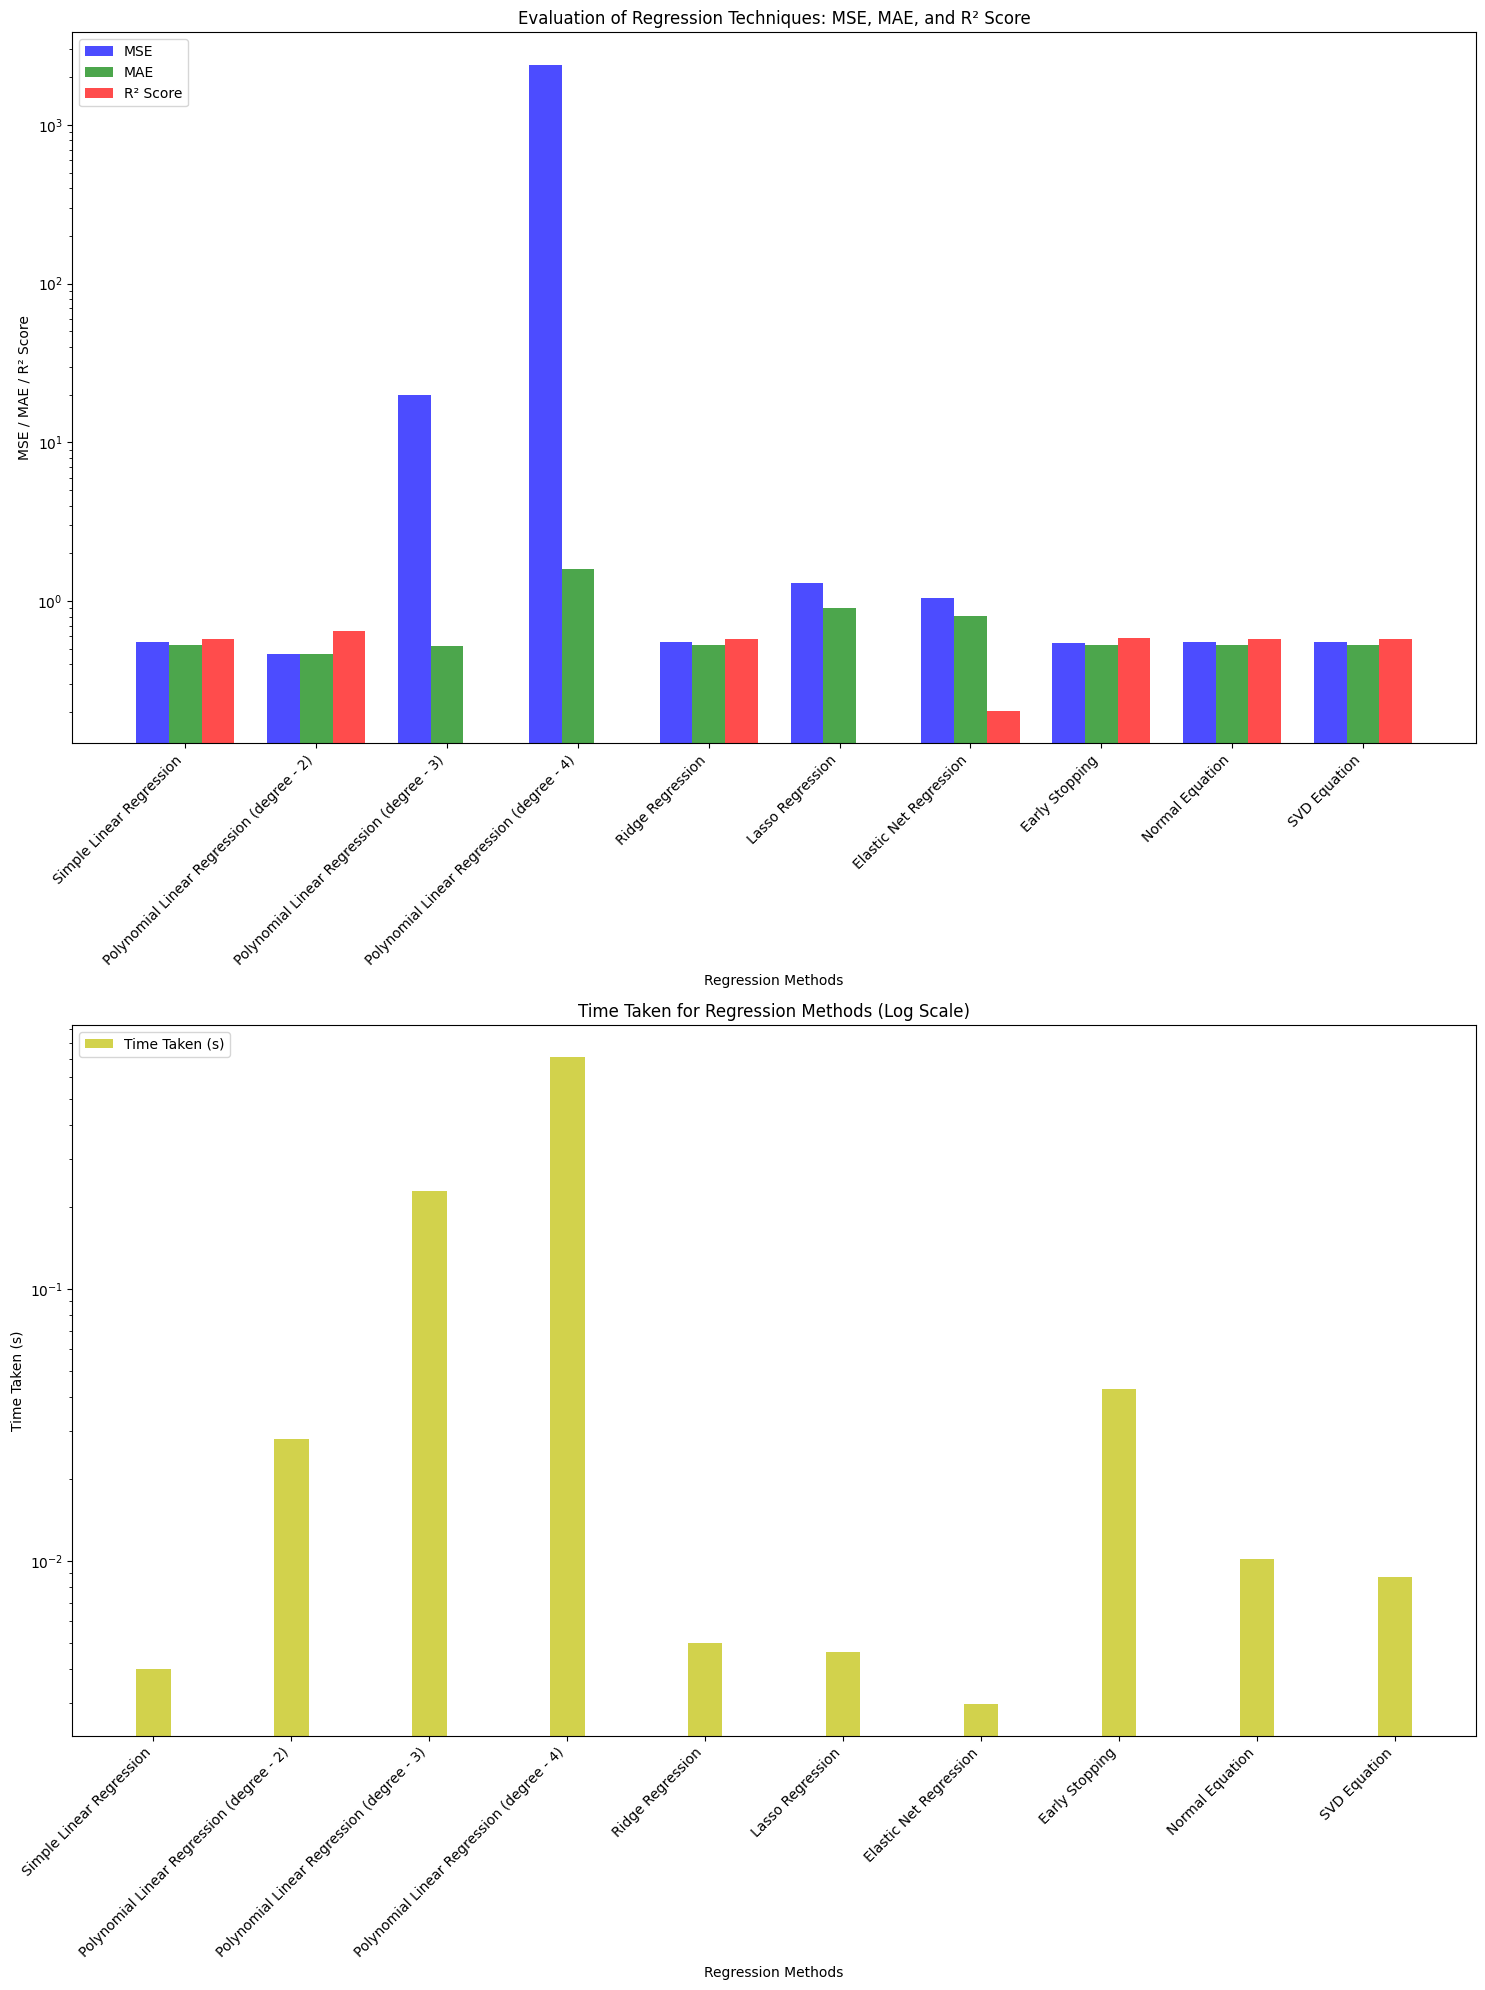

In [16]:
# Create the figure and subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

x = np.arange(len(matrices))
width = 0.25

ax[0].bar(x - width, matrices['Test MSE'], width, label='MSE', color='b', alpha=0.7)
ax[0].bar(x, matrices['Test MAE'], width, label='MAE', color='g', alpha=0.7)
ax[0].bar(x + width, matrices['Test R2'], width, label='R² Score', color='r', alpha=0.7)

ax[0].set_yscale('log')

ax[0].set_xlabel('Regression Methods')
ax[0].set_ylabel('MSE / MAE / R² Score')
ax[0].set_title('Evaluation of Regression Techniques: MSE, MAE, and R² Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(matrices.index, rotation=45, ha='right')
ax[0].legend(loc='upper left')



ax[1].bar(x, matrices['Time Taken'], width, label='Time Taken (s)', color='y', alpha=0.7)

ax[1].set_yscale('log')

ax[1].set_xlabel('Regression Methods')
ax[1].set_ylabel('Time Taken (s)')
ax[1].set_title('Time Taken for Regression Methods (Log Scale)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(matrices.index, rotation=45, ha='right')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


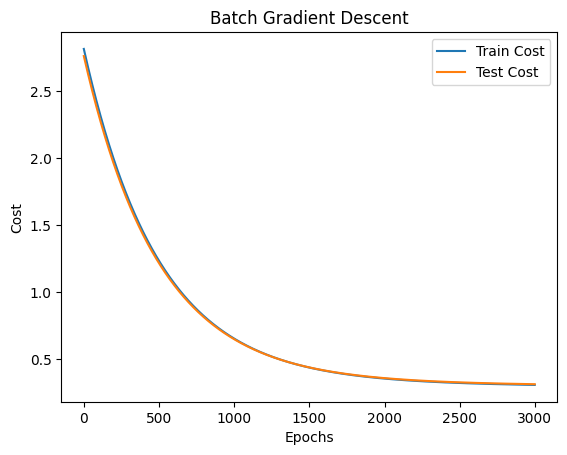

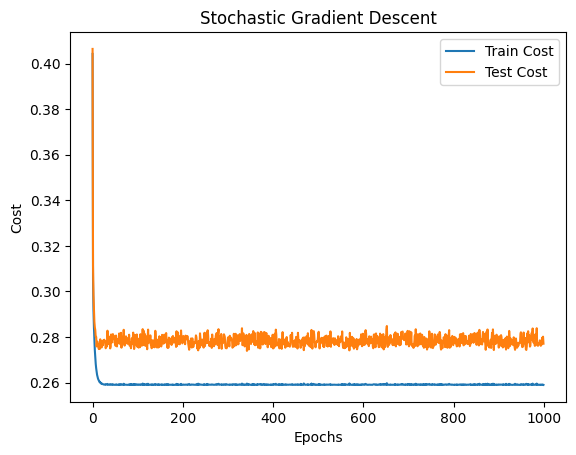

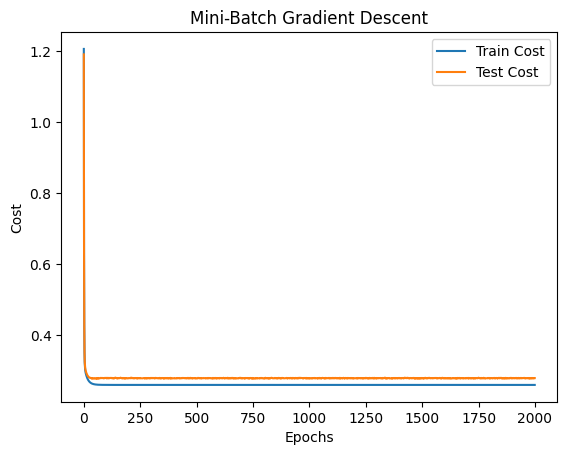

In [17]:
# plotting different type of gradient descent
def plot_costs(cost_history_train, cost_history_test, title):
    plt.plot(cost_history_train, label="Train Cost")
    plt.plot(cost_history_test, label="Test Cost")
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(title)
    plt.legend()
    plt.show()

plot_costs(cost_history_bgd_train, cost_history_bgd_test, "Batch Gradient Descent")
plot_costs(cost_history_sgd_train, cost_history_sgd_test, "Stochastic Gradient Descent")
plot_costs(cost_history_mini_batch_train, cost_history_mini_batch_test, "Mini-Batch Gradient Descent")


<Axes: title={'center': 'Time Taken for Different Gradient Descent Methods'}>

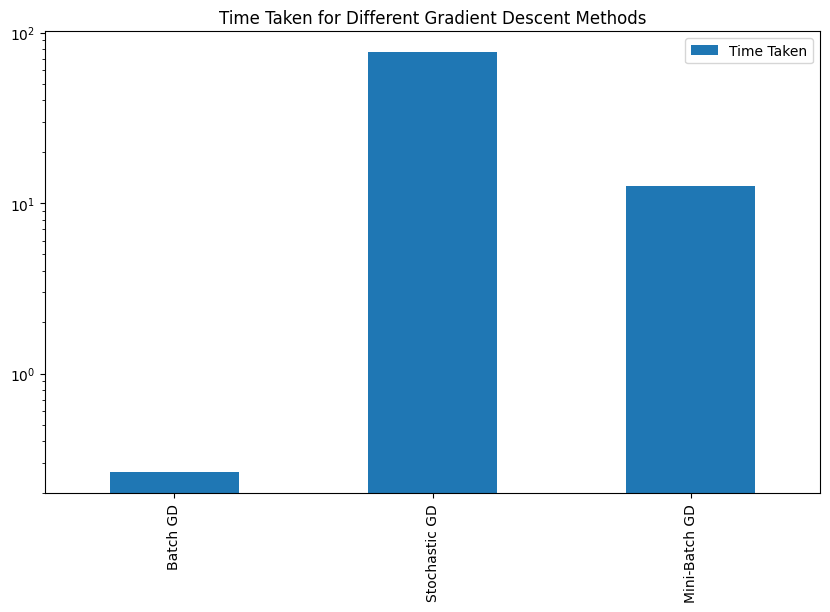

In [23]:
# plotting gradient descent time taken
gd_time.T.plot(kind='bar', figsize=(10, 6), logy=True, title='Time Taken for Different Gradient Descent Methods')


## 10. Conclusion

1. **Gradient Descent Performance:** 
   - Stochastic Gradient Descent (SGD) achieved the lowest cost, followed closely by Mini-Batch GD.
   - Batch GD was the slowest to converge but showed steady improvement.


2. **Regression Methods:**
   - Polynomial Regression (degree 2) performed best among traditional methods, with the highest R2 scores.
   - Simple Linear Regression, Ridge Regression, Normal Equation, and SVD Equation showed identical performance, suggesting the problem might be well-conditioned.
   - Lasso and Elastic Net had poor performance, indicating that strong regularization may not be suitable for this dataset.

3. **Overfitting Concerns:**
   - Polynomial Regression with degrees 3 and 4 showed signs of severe overfitting, with test MSE much higher than train MSE.
   - As we increase the degree of polynomial features, we dramatically increase the model's complexity. A higher-degree polynomial can fit the training data more closely, potentially capturing noise rather than just the underlying pattern.

4. **Computation Time:**
   - Most methods were computationally efficient, with Elastic Net being the fastest.
   - SGD took the longest time among gradient descent methods but achieved the best performance.